# D2 - Basic Sky Extraction

Practicing image manipulation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

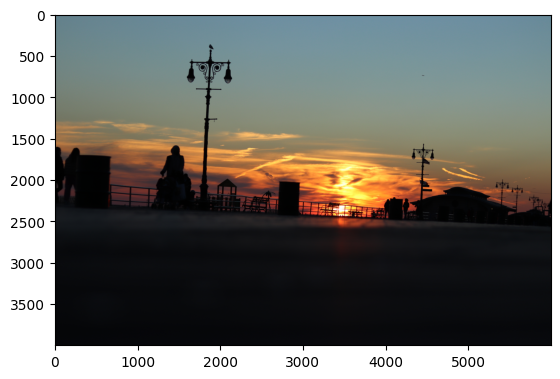

In [16]:
# Get the image and show
image = cv2.imread("Resources/D2/IMG_0990.JPG")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

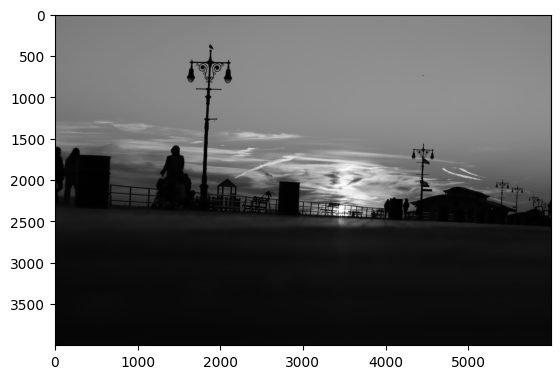

In [17]:
# Grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image_gray, cmap="gray")
plt.show()

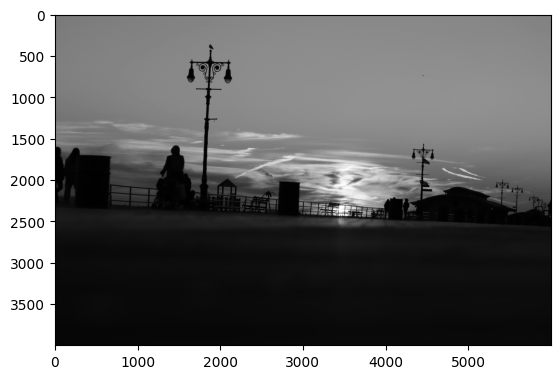

In [18]:
# Blur the image
image_blurred = cv2.GaussianBlur(image_gray, (3, 3), sigmaX=2, sigmaY=2)
plt.imshow(image_blurred, cmap="gray")
plt.show()

In [19]:
# Get median pixel
median_pixel = np.median(image_gray)
median_pixel

90.0

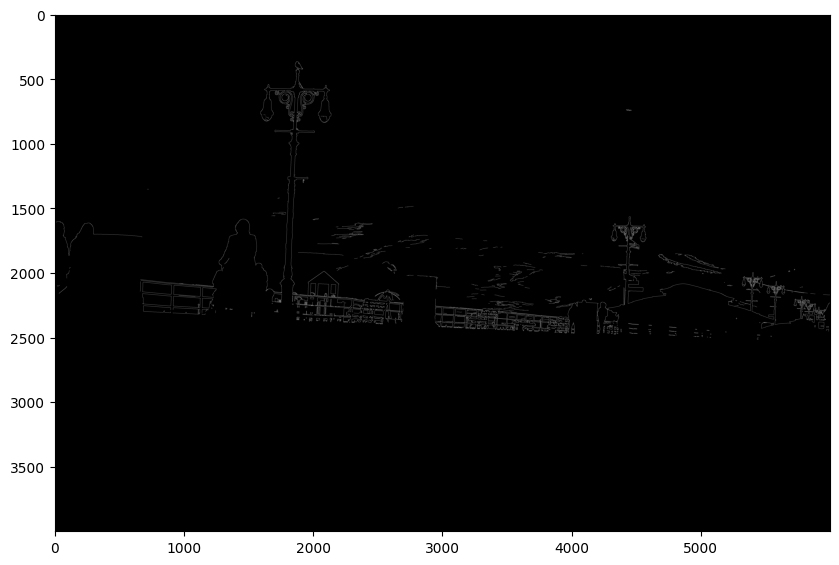

In [24]:
# Get low and high threshold for Canny
low = 0.7 * median_pixel
high = 1.3 * median_pixel

# Get edges
edges = cv2.Canny(image_gray, low, high)

plt.figure(figsize=(10, 10))
plt.imshow(edges, cmap='gray')
plt.show()

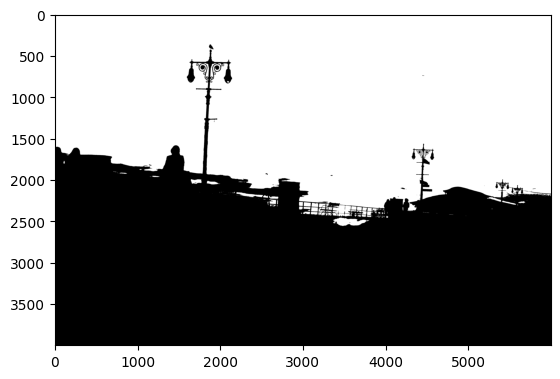

In [22]:
# Otsu
ret, threshold_image = cv2.threshold(image_blurred, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)

plt.imshow(threshold_image, cmap="gray")
plt.show()

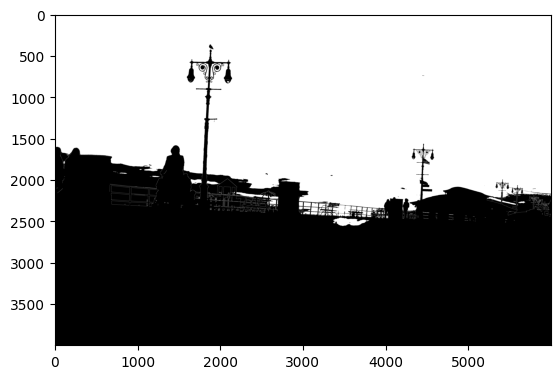

In [25]:
# Combine edges and thresholded image
combined_mask = cv2.bitwise_or(edges, threshold_image)

plt.imshow(combined_mask, cmap="gray")

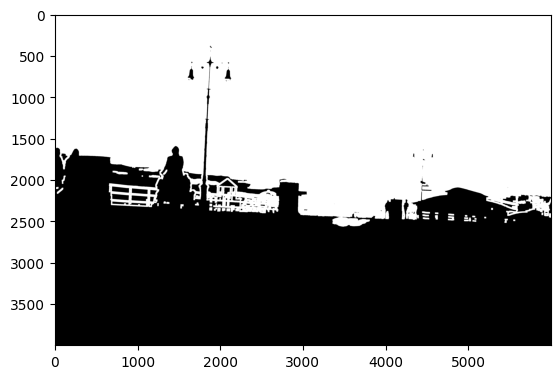

In [31]:
#Dilate expands the white areas on the image, 4 iterations
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(combined_mask,kernel,iterations = 4)

plt.imshow(dilation, cmap="gray")

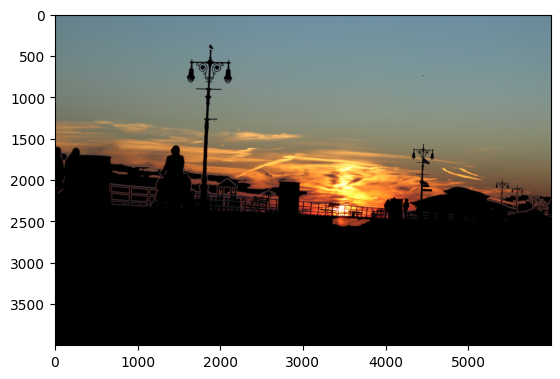

In [34]:
# Make a copy of original image and turn all 0 pixes of dilated image to black in copied image
masked = image.copy()
masked[dilation == 0] = [0, 0, 0]

plt.imshow(masked)
plt.show()